<center><h1>Pseudo-spectral method for homogeneous</h1></center>
<center><h1>isotropic decaying turbulence</h1></center>


---
<center><h3>Author: <a href="https://github.com/marinlauber">Marin Lauber</a></h3></center>

In [1]:
import time as t
import numpy as np
from fluid import Fluid

## Mathematical formulation


### Vorticity equation

The vorticity (or _Helmholtz's_) equation describes the transport of vorticity. We can obtain it by applying the curl operator to the _Navier-Stokes_ equations

<a id='1.1'></a>
\begin{equation}
\nabla \times\left(  \frac{\partial\boldsymbol{u}}{\partial t} + (\boldsymbol{u}\cdot \nabla)\boldsymbol{u} = -\frac{1}{\rho}\nabla p + \nu \nabla^2 \boldsymbol{u}\right),  \tag{1.1}
\end{equation}

where $\boldsymbol{u}$ is the velocity field and $p$ is the pressure field. The convective term can be re-arranged to a more suitable form

\begin{equation}
\boldsymbol{u}\times\left(\nabla\times\boldsymbol{u}\right) + \left(\boldsymbol{u}\cdot\nabla\right)\boldsymbol{u} = \nabla\left(\frac{\boldsymbol{u}^2}{2}\right) \rightarrow  \left(\boldsymbol{u}\cdot\nabla\right)\boldsymbol{u} = \nabla\left(\frac{\boldsymbol{u}^2}{2}\right) + \boldsymbol{\omega}\times\boldsymbol{u},
\end{equation}

using definition of the vorticity ($\boldsymbol{\omega}=\nabla\times\boldsymbol{u}$). Substitution in [(1.1)](#1.1) gives

\begin{equation}
\nabla \times\left(  \frac{\partial\boldsymbol{u}}{\partial t} + \nabla\left(\frac{\boldsymbol{u}^2}{2}\right) + \boldsymbol{\omega} \times\boldsymbol{u} = -\frac{1}{\rho}\nabla p + \nu \nabla^2 \boldsymbol{u}\right).
\end{equation}

Distributing the curl operator and making use of the definition of the vorticity, we have

\begin{equation}
\frac{\partial\boldsymbol{\omega}}{\partial t} + \nabla \times\nabla\left(\frac{\boldsymbol{u}^2}{2}\right) + \nabla \times\left(\boldsymbol{\omega} \times\boldsymbol{u}\right) = -\nabla \times\left( \frac{1}{\rho}\nabla p\right) + \nu \nabla^2 \boldsymbol{\omega}.
\end{equation}

The third term can be expanded using the _curl of the curl_ vector identity

\begin{equation}
\frac{\partial\boldsymbol{\omega}}{\partial t} + \nabla \times\nabla\left(\frac{\boldsymbol{u}^2}{2}\right) + \boldsymbol{u}\cdot\nabla\boldsymbol{\omega} - \boldsymbol{u}\nabla\cdot\boldsymbol{\omega} - \boldsymbol{\omega}\cdot\nabla\boldsymbol{u} + \boldsymbol{\omega}\nabla\cdot\boldsymbol{u} = -\nabla \times\left( \frac{1}{\rho}\nabla p\right) + \nu \nabla^2 \boldsymbol{\omega}.
\end{equation}

The fourth term vanishes as $\nabla\cdot\boldsymbol{\omega}\equiv 0$ (the divergence of the curl of a vector field is always zero). For an incompressible flow the sixth term equaly vanishes

\begin{equation}
	\frac{\partial\boldsymbol{\omega}}{\partial t} + \nabla \times\nabla\left(\frac{\boldsymbol{u}^2}{2}\right) + \boldsymbol{u}\cdot\nabla\boldsymbol{\omega} - \boldsymbol{\omega}\cdot\nabla\boldsymbol{u}  = -\nabla \times\left( \frac{1}{\rho}\nabla p\right) + \nu \nabla^2 \boldsymbol{\omega}.
\end{equation}

The second term, which is the _curl of a tensor_, can be shown to vanish as well. Indeed, the curl of a tensor  $\boldsymbol{S}$ is defined as

\begin{equation}
	(\nabla\times\boldsymbol{S})\cdot\boldsymbol{a} = \nabla\times(\boldsymbol{S}^\top \cdot\boldsymbol{a}) \quad \forall \boldsymbol{a}, 
\end{equation}

where $\boldsymbol{a}$ is a vector. In this case, the tensor $\boldsymbol{S}$ is given by the gradient of a vector field, and as gradient and divergence commute

\begin{equation}
	\left(\nabla \times\nabla\left(\frac{\boldsymbol{u}^2}{2}\right)\right)\cdot\boldsymbol{a} = \nabla\times\left(\nabla^\top\left(\frac{\boldsymbol{u}^2}{2}\right)\cdot\boldsymbol{a}\right) = \nabla\times\left(\nabla\left(\frac{\boldsymbol{u}^2}{2}\cdot\boldsymbol{a}\right)\right) = \nabla\times\nabla\psi\equiv0.
\end{equation}

As the curl of the gradient of a scalar field is always zero. Finally, the pressure term can be expanded using the product rule

\begin{equation}
	\nabla \times\left( \frac{1}{\rho}\nabla p\right) = \nabla\left( \frac{1}{\rho}\right) \times\nabla p + \left( \frac{1}{\rho}\right)\nabla \times\nabla p = \frac{1}{\rho^2}\nabla\rho\times\nabla p.
\end{equation}

The last term is zero. For a flow with constant entropy (incompressible, homentropic), the pressure is solely a function of density, this means that the two vector $\nabla\rho$ and $\nabla p$ are aligned and the fist term equaly vanishes. (More precisely, the baroclinic term which account for the change in the vorticity field due to the interaction of density and pressure surfaces [(Bailly et _al._)](#Bailly) vanishes). The vorticity equation is therefore given by

\begin{equation}
	\frac{\partial\boldsymbol{\omega}}{\partial t} + \boldsymbol{u}\cdot\nabla\boldsymbol{\omega} = \boldsymbol{\omega}\cdot\nabla\boldsymbol{u} + \nu \nabla^2 \boldsymbol{\omega}.
\end{equation}

In 2D, these equations can be simplified further by noting that the component of the velocity field are

\begin{equation}
\boldsymbol{u} = (u, v, 0), \quad \frac{\partial}{\partial z} =0.
\end{equation}

The vorticity is, by definition, normal to the $x$-$y$ plane ($\boldsymbol{\omega}=(0, 0, \omega_z)$). This means that the term $\boldsymbol{\omega}\cdot\nabla\boldsymbol{u}$ is zero, as is easily demonstrated

\begin{equation}
	\boldsymbol{\omega}\cdot\nabla\boldsymbol{u} = \left(\underbrace{\omega_x}_{0}\frac{\partial}{\partial x} + \underbrace{\omega_y}_{0}\frac{\partial}{\partial y} + \omega_z\underbrace{\frac{\partial}{\partial z}}_{0}\right)\boldsymbol{u}.
\end{equation}

This term is the so-called vortex-stretching term. It is the mean by which the energy is cascaded from the large scales to the smaller scales following the $k^{-5/3}$ rule. In 2D this means that the angular velocity of a particle is conserved, and the length of a vortex tube cannot change due to continuity [, see MIT notes](#MIT).

In 3D, the vortex-stretching term has the form $\omega_{j}\frac{\partial u_i}{\partial x_j}$, thus looking at, say the second component, we have

\begin{equation}
	\omega_{j}\frac{\partial u_i}{\partial x_j} = \omega_{1}\frac{\partial u_2}{\partial x_1} + \omega_{2}\frac{\partial u_2}{\partial x_2} + \omega_{3}\frac{\partial u_2}{\partial x_3}, 
\end{equation}

the first and the third components can be seen as _vortex-turning_ and the second component is the vortex-stretching.

We also note that because the vorticity field has only one non-zero component, the only equation for the transport of vorticity is given by

<a id='1.2'></a>
\begin{equation}
	\frac{\partial\omega}{\partial t} +u\frac{\partial\omega}{\partial x} + v\frac{\partial\omega}{\partial y} =  \frac{1}{Re} \left(\frac{\partial^2\omega}{\partial x^2}+ \frac{\partial^2\omega}{\partial y^2}\right).
\tag{1.2}
\end{equation}

Where $Re$ is the Reynold's number of the flow.

## Stream function

To remove the implicit dependency on the velocity field from the vorticity equation, we introduce a vector-valued stream function $\boldsymbol{\psi}$. We will now show that for 2D flows this is in fact a scalar function. Using the definition of the stream function, we have

\begin{equation}
	\boldsymbol{u} = \nabla\times\boldsymbol{\psi}, \qquad u_i = \varepsilon_{ijk}\frac{\partial \psi_k}{\partial x_j},
\end{equation}

where the only two non-zero components of the velocity field are

\begin{equation}
	 u_1 = \varepsilon_{123}\frac{\partial \psi_3}{\partial x_2}=\frac{\partial \psi_3}{\partial x_2}, \qquad u_2 = \varepsilon_{213}\frac{\partial \psi_3}{\partial x_1}=-\frac{\partial \psi_3}{\partial x_1}.
\end{equation}

With $\varepsilon_{ijk}$, the Levi-Civita permutation symbol. Thus only one component of the stream-function is non-zero, and it can be seen as a scalar field $\psi$, with the following relationship to the velocity field

\begin{equation}
	u = \frac{\partial \psi}{\partial y}, \,\,\,\, v = -\frac{\partial \psi}{\partial x}.
\end{equation}

We can substitute these relation into the vorticity equation [(1.2)](#1.2), giving

<a id='1.3'></a>
\begin{equation}
	\frac{\partial\omega}{\partial t} +\frac{\partial \psi}{\partial y}\frac{\partial\omega}{\partial x} - \frac{\partial \psi}{\partial x}\frac{\partial\omega}{\partial y} =  \frac{1}{Re} \left(\frac{\partial^2\omega}{\partial x^2}+ \frac{\partial^2\omega}{\partial y^2}\right).
\tag{1.3}
\end{equation}

A very useful property of the stream function is that is existence guarantees the flow to be solenoidal (satisfies continuity). Indeed, substitution of the definition of the stream function into the continuity equation gives

\begin{equation}
	\nabla\cdot\boldsymbol{u} = \nabla\cdot(\nabla\times\boldsymbol{\psi})\equiv 0.
\end{equation}

[(1.3)](#1.3) still has 2 unknowns, $\psi$ and $\omega$, fortunately we can build a Poisson equation for the vorticity by substituting the velocity components, in terms of the stream function, in the definition of the only non-zero component of the vorticity

\begin{equation}
	\omega_{i}=\varepsilon_{ijk}\frac{\partial u_k}{\partial x_j} \qquad \rightarrow \qquad \omega =\omega_{z}=\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

giving

<a id='1.4'></a>
\begin{eqnarray}
  \omega =-\frac{\partial }{\partial x}\frac{\partial \psi}{\partial x} - \frac{\partial }{\partial y}\frac{\partial \psi}{\partial y} &=& -\frac{\partial^2 \psi}{\partial x^2} - \frac{\partial^2 \psi}{\partial x^2},\nonumber\\
	-\omega&=&\frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial x^2}.
    \tag{1.4}
\end{eqnarray}

Equation [(1.3)](#1.3) together with [(1.4)](#1.4) can be solved to simulate the transport of a vorticity field.

## Numerical method

### Spectral collocation method

For periodic problems, such as the one of homogeneous isotropic decaying turbulence in a periodic domain, collocation methods using trigonometric polynomial expansions are unmatched in terms of accuracy and precision. However, they tend to be an order of magnitude more expensive (computationally) when compared to high-order finite difference schemes. Fortunately, when using trigonometric basis functions, the use of Fast Fourier Transform (_FFT_'s) routines allows for a reduction in the computational time. We describe here the implementation of such a method to solve [(1.3)](#1.3) and [(1.4)](#1.4).


We define the forward Fourier transform of a discrete field $u$ as (transforming from Fourier to physical space), following [San et _al._](#San)

<a id='2.1'></a>
\begin{equation}
  u_{i,j} = \sum_{m=-\frac{N_x}{2}}^{\frac{N_x}{2}-1}\sum_{n=-\frac{M_y}{2}}^{\frac{M_y}{2}-1}\tilde{u}_{m,n}e^{\boldsymbol{i}\left( \frac{2\pi m}{L_x} x_i + \frac{2\pi n}{L_y}y_j \right)},
 \tag{2.1}
\end{equation}

with its opposite transform, the backward Fourier transform (transforming from physical to Fourier space)

\begin{equation}
	\tilde{u}_{m,n} = \frac{1}{N_xN_y}\sum_{i=0}^{N_x-1}\sum_{j=0}^{N_y-1} u_{i,j}e^{\boldsymbol{-i}\left( \frac{2\pi m}{L_x} x_i + \frac{2\pi n}{L_y}y_j \right)}.
\end{equation}

We note here that the transforms are normalised, a forward, followed by a backward transform recover the initial discrete field. In this case we have chosen to normalise the backward transform.
The wave numbers are defined as

\begin{equation}
	k_x = \frac{2\pi m}{L_x}, \qquad k_y = \frac{2\pi n}{L_y}.
\end{equation}

The natural ordering of Fourier coefficients is as shown in [(2.1)](#2.1), however, _FFT_ routines organise them in a different way, for a reason of algorithm efficiency

\begin{equation}
	k_x = \left[0, 1, \cdots, \frac{N_x}{2}-1, -\frac{N_x}{2}, \cdots, -2, -1 \right],
\end{equation}

for an even number of grid points. See below:

In [2]:
np.fft.fftfreq(10, d=1./10)

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

The $N_x$ discrete collocation (grid) points are uniformly space in our $[L_x, L_y]$ domain as

\begin{equation}
	x_i = \frac{iL_x}{N_x} ,\qquad y_i = \frac{iL_y}{N_y},
\end{equation}

with $i=0, 1, \cdots, N_x/N_y$. Because the problem is periodic, $x_0 = x_{N_x}$, we do not include the last grid point in the simulations, as collocation methods using periodic basis functions automatically impose the periodicity on the problem.

The high precision of the spectral collocation method comes from its ability to threat spatial derivatives. By transforming a discrete physical field to Fourier-space, what would otherwise be done using a differential scheme (truncated to a certain accuracy), derivatives are evaluated by multiplying the Fourier coefficients by the corresponding complex wave number, for example, the $n^{th}$  $x$-derivative of a discrete field $u$ is given by

\begin{equation}
	\frac{\partial^{(n)} u_{i, j}}{\partial x^{(n)}} = \sum_{m=-\frac{N_x}{2}}^{\frac{N_x}{2}-1}\sum_{n=-\frac{M_y}{2}}^{\frac{M_y}{2}-1}\tilde{u}_{m,n}(\boldsymbol{i}k_x)^{(n)}e^{\boldsymbol{i}\left( \frac{2\pi m}{L_x} x_i + \frac{2\pi n}{L_y}y_j \right)},
\end{equation}

this is the power of spectral collocation methods. The only errors associated with this operation are the interpolation and truncation errors \cite{spectral}, which are much smaller than the finite-difference equivalent.


Applying these operators to the vorticity transport equation result in a transport equation for the discrete Fourier coefficients

\begin{equation}
	\frac{\partial\tilde{\omega}_{m,n}}{\partial t} + (\boldsymbol{i}k_y\tilde{\psi}_{m,n}\circ\boldsymbol{i}k_x\tilde{\omega}_{m,n}) - (\boldsymbol{i}k_x\tilde{\psi}_{m,n}\circ\boldsymbol{i}k_y\tilde{\omega}_{m,n}) = \frac{1}{Re}\left[\left(-k_x^2 - k_y^2\right)\tilde{\omega}_{m,n}\right]
\end{equation}

where the $(\cdots\circ\cdots)$ operator represents a convolution sum. Treating of this term in Fourier space involves solving triad interactions, this is very expansive, $O(N^2)$.
In the pseudo-spectral approach, this term is treated in physical space with the help of the convolution theorem, which reduces the cost to $O(45/4N\log_2 (3/2N))$.

#### Aliasing 

To prevent high frequencies modes of being falsly represented on the discrete grid dealiasing is employed. Here we use $3/2$ rule to pad the wave number during the transforms. Instead of using the inverse _FFT_ with $N$ points, we use $M = 3/2N$ points. The new Fourier coefficients are zero-padded [(Canuto et _al._)](#Canuto), that is

\begin{eqnarray}
	\tilde{\omega}_{m, n} &=& \tilde{\omega}_{m, n}, \quad\quad |m|\le N_x, \quad |n|\le N_y,\nonumber\\
	\tilde{\omega}_{m, n} &=& 0  \quad\quad\quad\quad |m|> N_x, \quad |n|> N_y.
\end{eqnarray}

Once we have obtained the two terms in the convolution sum in physical space via the backward transform and using $M$ points, we simply proceed to a multiplication. The result is then transformed back in Fourier space using the forward transform, still with $M$ points. We then discard all modes whose wave numbers are greater than $N_x$ and $N_y$. In summary, the convolution sums are treated as

\begin{equation}
	(\boldsymbol{i}k_y\tilde{\psi}_{m,n}\circ\boldsymbol{i}k_x\tilde{\omega}_{m,n}) = \left[\mathcal{F}_{M}\left(\mathcal{F}^{-1}_{M}(\boldsymbol{i}k_y\tilde{\psi}_{m,n})\mathcal{F}^{-1}_{M}(\boldsymbol{i}k_x\tilde{\omega}_{m,n})\right)\right]_{N}\,,
\end{equation}

where $\mathcal{F}_{M}$ represent a _Fast Fourier Transform_ using $M$ points, but we are ultimately interested only in $N$ of them, and the remaining are discarded. 

In [3]:
def _add_convection(self):
        """
        Convective term. To prevent alliasing, we zero-pad the array before
        using the convolution theorem to evaluate it in physical space.
        """
        # initialize padded arrays
        j1f_padded = np.zeros((self.mx,self.mk),dtype='complex128')
        j2f_padded = np.zeros((self.mx,self.mk),dtype='complex128')
        j3f_padded = np.zeros((self.mx,self.mk),dtype='complex128')
        j4f_padded = np.zeros((self.mx,self.mk),dtype='complex128')

        # populate
        j1f_padded[self.padder, :self.nk] = 1.0j*self.kx[:self.nk     ]*self.psih[:,:]
        j2f_padded[self.padder, :self.nk] = 1.0j*self.ky[:, np.newaxis]  *self.wh[:,:]
        j3f_padded[self.padder, :self.nk] = 1.0j*self.ky[:, np.newaxis]*self.psih[:,:]
        j4f_padded[self.padder, :self.nk] = 1.0j*self.kx[:self.nk     ]  *self.wh[:,:]
        
        # backward transform
        j1 = np.fft.irfft2(j1f_padded, axes=(-2,-1))
        j2 = np.fft.irfft2(j2f_padded, axes=(-2,-1))
        j3 = np.fft.irfft2(j3f_padded, axes=(-2,-1))
        j4 = np.fft.irfft2(j4f_padded, axes=(-2,-1))
        
        # forward transform
        jacpf = np.fft.rfft2(j1*j2 - j3*j4, axes=(-2,-1))

        # this term is the result of padding, padder allows for easier sclicing
        self.dwhdt[:,:] = jacpf[self.padder, :self.nk]*self.pad**(2) 

#### A note on FFTs in Python

These examples use the strandard numpy _FFT_ routines. Those are highly inefficient. A much better FFT library is [pyFFTw](https://pypi.org/project/pyFFTW/), but this increase in speed comes at the cost of more complexity. In brief, arrays that will be transformed must be aligned in memory and this requires modifying their content instead of assigning them new values every time we update their values, which explains the `dwhdt[:,:]` part. For an example on how to use pyFFTw see [here](https://github.com/marinlauber).

#### Stream-function

The Fourier coefficients of the stream function are obtained by the explicit relationship between vorticity and stream-function

\begin{equation}
	-\tilde{\omega}_{m, n} = (-k_x^2 - k_y^2)\tilde{\psi}_{m,n} \qquad\rightarrow\qquad \tilde{\psi}_{m,n} = \frac{\tilde{\omega}_{m, n}}{(k_x^2 + k_y^2)}.
\end{equation}

We note here that the mode $\tilde{\psi}_{0,0}$ is the results of a division by zero and represents the mean value of $\psi$. To avoid issues with round-up errors accumulating and poluting the solution, it is explicitly set to zero each computation of the stream-function.

In [4]:
def _get_psih(self):
    """
    Spectral stream-function from spectral vorticity
    """
    # k2I stores inverse of k^2, with zero at [0, 0]
    self.psih[:,:] = self.wh[:,:] * self.k2I[:,:]

### Time integration

Using spectral operators for the spatial derivatives ensures that the discretisation error of spatial terms is kept to a minimum. In order to keep the global discretisation errors low, high-order temporal integrator are required. We implement both a third and a fourth-order Runge-Kutta method.
The third-order TVD Runge-Kutta method is defined as~\cite{spectral}

\begin{eqnarray}
	\tilde{\omega}^{(1)} &=& \tilde{\omega}^{n} + \Delta t \mathcal{L}(\tilde{\omega}^n),\nonumber\\
	\tilde{\omega}^{(2)} &=& \frac{3}{4}\tilde{\omega}^{n} + \frac{1}{4}\tilde{\omega}^{(1)} +\frac{1}{4}\Delta t\mathcal{L}(\tilde{\omega}^{(1)}),\nonumber\\
	\tilde{\omega}^{n+1} &=& \frac{1}{3}\tilde{\omega}^n + \frac{2}{3}\tilde{\omega}^{(2)} + \frac{2}{3}\Delta t\mathcal{L}(\tilde{\omega}^{(2)}),
\end{eqnarray}

where $\mathcal{L}(\tilde{\omega}_n)$ represents all the spatial operators of the transport equation of the Fourier coefficients. Another scheme of order $s$ (for linear problems) that is also TVD and can be easily implemented is

\begin{eqnarray}
  \tilde{\omega}^{(1)} &=& \tilde{\omega}^{n} + \frac{1}{s}\Delta t \mathcal{L}(\tilde{\omega}^n),\nonumber\\
  \tilde{\omega}^{(2)} &=& \tilde{\omega}^{n} + \frac{1}{s-1}\Delta t \mathcal{L}(\tilde{\omega}^{(1)}),\nonumber\\
  \cdots &&\nonumber\\
  \tilde{\omega}^{n+1} &=& \tilde{\omega}^n + \frac{1}{1}\Delta t\mathcal{L}(\tilde{\omega}^{(s)}).
\end{eqnarray}	

Applying the time integration to the fourier coefficients allows us to save two transform per time-steps.

In [5]:
def update(self, s=3):
    """
    Explicit low-storage S-order Runge-Kutta method from
    Jameson, Schmidt and Turkel (1981).
    Input:
        s : float
            - desired order of the method, default is 3rd order
    """
    # iniitalise
    self.w0 = self.wh

    for k in range(s, 0, -1):
        
        # invert Poisson equation for the stream function
        self._get_psih()

        # get convective forces (resets dwhdt)
        self._add_convection()

        # add diffusion
        self._add_diffusion()

        # step in time
        self.wh = self.w0 + (self.dt/k) * self.dwhdt

    self.time += self.dt
    self.it += 1
    self._cfl_limit()

#### Addaptive time-step

The time-step is adjusted based on the Courrant condition in the worst cell of the domain. For a third-order Runge-Kutta scheme, the maximum CFL number is $\sqrt{3}$. This gives the following time-setp, for stability

\begin{equation}
  \Delta t = \frac{\sqrt{3}}{D_c + D_{\mu}},
\end{equation}

where $D_c$ and $D_{\mu}$ are the convective and diffusive velocity scales

\begin{eqnarray}
  D_c &=& \max\left(\pi\left(\frac{1+\vert u\vert}{\Delta x} +\frac{1+\vert v\vert}{\Delta y} \right)\right),\nonumber\\
  D_{\mu} &=& \max\left(\pi^2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right)\right).
\end{eqnarray}

These are derived from the advection-diffusion equation (which is very similar to [(1.3)](#1.3)), by writting it as a forst order ODE by applying Fourier transform to the original equation. The convective and diffusive time-scales are then obtained by considering the worst case in the domain.

In [6]:
def _cfl_limit(self):
    """
    Adjust time-step based on the courant condition
    """
    self.get_u()
    self.get_v()
    Dc =  np.max(np.pi * ((1.+abs(self.u)) / self.dx + (1.+abs(self.v)) / self.dy))
    Dmu = np.max(np.pi**2*(self.dx**(-2) + self.dy**(-2)))
    self.dt = np.sqrt(3.) / (Dc + Dmu)

## Validation

### Taylor-Green vortex

We validate the numerical method described above using the Taylor-Green vortex, a known solution to the Navier-Stokes equation. Expressed in its 2D vorticity formulation, it reads

<a id='4.1'></a>
\begin{equation}
	\omega^e(x, y, t) = 2\kappa\cos(\kappa x)\cos(\kappa y)e^{-2\kappa^2t/Re}, \tag{4.1}
\end{equation}

where $\kappa=4$ is the number of vortices in each direction and $Re$ is the Reynolds number of the flow and is set to 1.0 for those simulations (dissipation is important in this flow). 

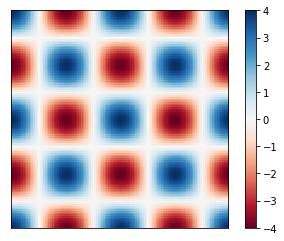

In [7]:
flow = Fluid(128, 128, Re=1.) # generate a 128x128 grid
flow.init_solver()
flow.init_field("Taylor-Green")
flow.display()

yes, there are more than 4 vortices, but this is because we are looking at vorticity, if we look at the velocity field we get the correct behaviour

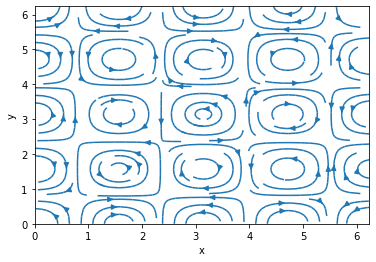

In [8]:
flow.display_vel()

Clearly, the flow that has this as a solution is purely dissipative, we should not expect the convective term to be important (in fact we can solve without it and still recover the right answer). This means that the vorticity is invariant under convection.

In [9]:
finish = 0.1
start_time = t.time()

# loop to solve
while(flow.time<=finish):

    #  update using RK
    flow.update()

    #  print every 100 iterations
    if (flow.it % 100 == 0):
        print("Iteration %d, time %f, time remaining %f. TKE: %f, ENS: %f" %(flow.it,
              flow.time, finish-flow.time, flow.tke(), flow.enstrophy()))
end_time = t.time()
print("\nExecution time for %d iterations is %f seconds." %(flow.it, end_time-start_time))

Iteration 100, time 0.020564, time remaining 0.079436. TKE: 0.180244, ENS: 23585.873276
Iteration 200, time 0.041258, time remaining 0.058742. TKE: 0.129470, ENS: 16941.804099
Iteration 300, time 0.061970, time remaining 0.038030. TKE: 0.092971, ENS: 12165.670770
Iteration 400, time 0.082698, time remaining 0.017302. TKE: 0.066744, ENS: 8733.753359

Execution time for 484 iterations is 11.454845 seconds.


We use the $L_2$-norm of the error between the exact solution and the simulation to quantify the error

\begin{equation}
	L_2 = \sqrt{\frac{1}{N_xN_y}\sum_{i=1}^{N_x} \sum_{j=1}^{N_y}|\omega^{e}_{i, j} - \omega_{i, j}|^2},
\end{equation}

and the $L_\infty$-norm

\begin{equation}
L\infty = \max{\vert \omega^{e}_{i, j} - \omega_{i, j} \vert}.
\end{equation}

In [10]:
# get final results
flow.wh_to_w(); w_n = flow.w

# exact solution
flow.init_field("Taylor-Green", t=flow.time)

# error norms
L2 = np.sqrt((flow.nx*flow.ny)**(-1)*np.einsum('ij->', (np.abs(flow.w - w_n))**2))
Linf = np.max(np.abs(flow.w - w_n))
print("L2-norm   of the error in the Taylor-Green vortex on a %dx%d grid is %e." %
      (flow.nx, flow.ny, L2))
print("Linf-norm of the error in the Taylor-Green vortex on a %dx%d grid is %e." %
      (flow.nx, flow.ny, Linf))

L2-norm   of the error in the Taylor-Green vortex on a 128x128 grid is 4.957489e-04.
Linf-norm of the error in the Taylor-Green vortex on a 128x128 grid is 9.914979e-04.


This is close to machine accuracy, in both norms. 

### Decaying Turbulence


We can also generate a random vorticity field, following [J. C. McWilliams](#MW) whose initial conditions are a Gaussian random realization for each Fourier component $\tilde{\psi}$

\begin{equation}
    \tilde{\psi}_{ij} \leftarrow \mathcal{N}(\mu, \sigma^2),
\end{equation}

where at each vector wavenumber the ensemble variance is proportional to the scalar wavenumber function

\begin{equation}
    \vert\psi\vert^2 = \kappa^{-1}\left[1 + \left(\frac{\kappa}{\kappa_0}\right)^4\right]^{-1},
\end{equation}

where $\kappa$ is the wavenumber magnitude. This spectrum is broad banded and peaks around $\kappa_0$ (set to $\kappa_0 = 6$ in the following). An aplitude factor is chosen such that the kinetic energy [(4.2)](#4.2) is equal to 0.5 initially.

This field can simply be generated by passing the `"McWilliams"` string to the flow initialization function.

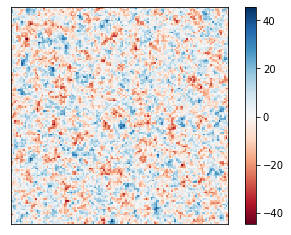

In [11]:
flow = Fluid(128, 128, Re=100.)
flow.init_solver()
flow.init_field("McWilliams")
flow.display()

To run case, you will need a powerful computer, but you can see the result below, for a 512x512 mesh, and a Reynolds number of 2000.

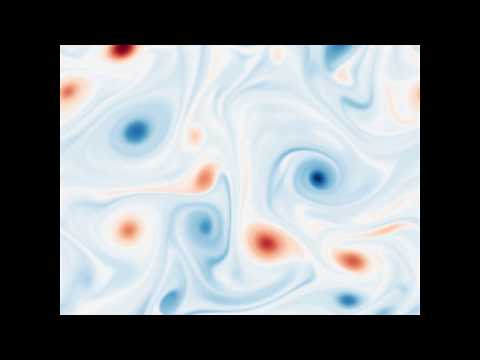

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('UiVaycAuYVY',width=400,height=400)

### Energy Spectrum

For homogeneous turbulence, we can define the energy spectrum to be a function of the stream-function

<a id='4.2'></a>
\begin{equation}
	E(k, t) = \sum_{k-\Delta k \le |\boldsymbol{ k}| \le k+\Delta k} \frac{1}{2} k^2 |\tilde{\psi}(\boldsymbol{ k}, t) |^2, \tag{4.2}
\end{equation}

where $\tilde{\psi}$ is readily obtained from the known vorticity field $\tilde{\omega}$. Each contribution to the final energy spectrum consist of the sum of all the energy contribution at each wavenumber falling within a prescribed bin size, or spectral band, $\Delta k$. The default number of bin used is 200, and the spectral band is defined as the Nyquist frequency devided by the number of bins.

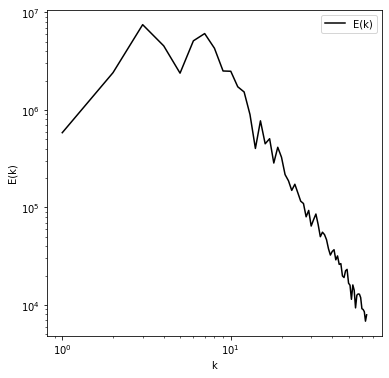

Kinetic energy: 0.505


In [13]:
flow.plot_spec()
print("Kinetic energy: %.3f" % flow.tke())

### Using your own initial field

It is very easy to generate different initial vorticity fields and start the simulation based on those, but remember that it must be periodic for the method to work! For eaxmple, and elliptic vortex can be defined as

\begin{equation}
    \omega = \exp\left(\frac{(\pi x)^2 + \beta(\pi x)^2) } {(L/s)^2}\right),
\end{equation}

where $\beta$ is the aspect ratio of the vortex, and $L/s$ allows the vortex to be scaled in the domain.

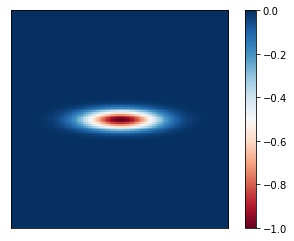

In [14]:
flow = Fluid(128, 128, 100)
flow.init_solver()
q = -np.exp(-((flow.x-np.pi)**2 + (4.0*(flow.y[:,np.newaxis]-np.pi))**2)/(np.pi/3.0)**2)
flow.init_field(field=q)
flow.display()

Or a vortex dipole

\begin{equation}
    \omega = \exp{\left(\frac{-((x-d)^2 + y^2)}{0.1d}\right)} \pm \exp{\left(\frac{-((x+d)^2 + y^2)}{0.1d}\right)},
\end{equation}

where $d$ is the spacing between the contra(-) or co(+) rotatif vortices.

In [15]:
def f(x, y, d=0.1, coo=True): 
    x = x-abs((x[0]+x[-1])*.5); x = x/x.max()/2.5
    y = y-abs((y[0]+y[-1])*.5); y = y/y.max()/2.5
    q =  np.exp(-((x-d)**2 + y[:, np.newaxis]**2)/(.1*d)) + (2*int(coo)-1)*np.exp(-((x+d)**2 + (y[:, np.newaxis])**2)/(.1*d))
    return q

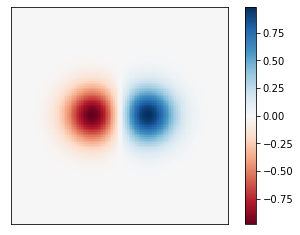

In [16]:
flow = Fluid(128, 128, 100)
flow.init_solver()
flow.init_field(field=f(flow.x,flow.y,coo=False))
flow.display()

### References

   [1]<a id='Bailly'></a> C. Bailly, G. Comte-Bellot. _Turbulence_. Springer Series in: Experimental Fluid Mechanics. 2015.
    
   [2]<a id='MIT'></a> MIT. [_Marine Hydrodynamics Lecture 9_](https://ocw.mit.edu/courses/mechanical-engineering/2-20-marine-hydrodynamics-13-021-spring-2005/lecture-notes/). MIT Marine Hydrodynamics lectures notes. 2005.		
		
   [3]<a id='San'></a> O. San, A. E. Staples. [_High-order methods for decaying two-dimensional homogeneous isotropic turbulence_](https://www.sciencedirect.com/science/article/abs/pii/S0045793012001363). Computer & Fluids 63. p: 105--127. 2012.
  
   [4]<a id='Canuto'></a> C. Canuto, M. Y. Hussaini, A.Quarteroni, T. A. Zang. _Spectral Methods in Fluid Dynamics_. Springer Series in: Computational Physics. 1988.
   
   [4]<a id='MW'></a> J. C. McWilliams. [_The emergence of isolated coherent vortices in turbulent flow_](https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/emergence-of-isolated-coherent-vortices-in-turbulent-flow/3EB789299B1A730265A5EC522E35B630). Journal of fluid mechanics 146. p: 21--43. 1984.

---